#TP2 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images

**But du TP** :
* comprendre le domaine des fréquences d'une image
* Effectuer un filtrage fréquentiel sur l'image

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

**Astuces**:
* Essayez de faire fonctionner vos algorithmes sur n'importe quelle taille d'image.
* N'hésitez pas à créer des fonctions pour chaque partie des traitements.
* Voici un schéma des traitements à effectuer pour vous y retrouver danc ce TP :
![schéma TP](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/annexes/TP2_Intro_TS.png?ref_type=heads)

In [1]:
# OS setup
#!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

Selecting previously unselected package tree.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
Cloning into 'tp-m1-ts'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 78 (delta 1), reused 0 (delta 0), pack-reused 58
Receiving objects: 100% (78/78), 4.11 MiB | 18.14 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from IPython.display import Audio

##Domaine spectral d'une image

Vous allez travailler sur un extrait de l'image de [Lena](https://en.wikipedia.org/wiki/Lenna) :

![Lena extract](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/lena.jpg?ref_type=heads)

In [83]:
img = plt.imread('/content/tp-m1-ts/tp2/lena.jpg')

Il s'agit d'une image en 256 niveaux de gris. Affichez cette image avec cette carte de couleurs.

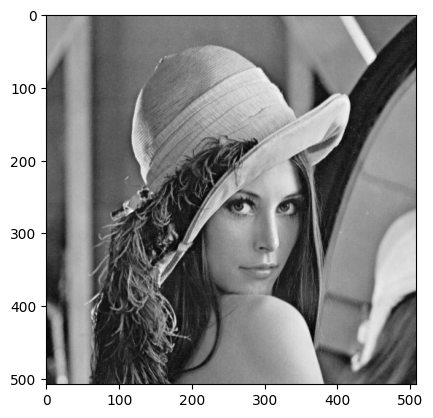

In [84]:
# Afficher l'image en niveaux de gris
plt.imshow(img, cmap='gray')
plt.show()

* Calculer la représentation fréquentielle de l'image, en utilisant la transformée de Fourier discrète bidimensionnelle : [numpy.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html)

**Attention** : le résultat est une matrice complexe de même dimension que la matrice originale !
Pour visualiser cette matrice de coefficients complexes, il faut calculer le module, puis afficher le résultat sur une échelle d'intensité logarithmique.

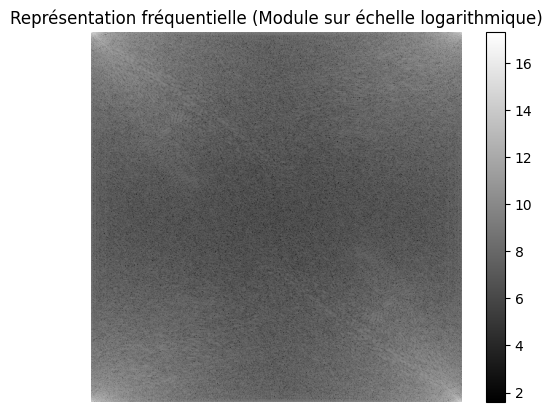

In [85]:
fft_img = np.fft.fft2(img)

# Calculer le module
magnitude_spectrum = np.abs(fft_img)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.colorbar()
plt.title('Représentation fréquentielle (Module sur échelle logarithmique)')
plt.show()

# Localisation des hautes et basses fréquences

**Attention** : la représentation Python n'est pas la représentation conventionnelle ! En image on applique un fftshift en général en plus. Ici, Ne réalisez pas cette opération pour la réponses aux question ci-dessous, sinon vous allez inverser les interprétations.

**Méthode** : retirer des zones de fréquences de l'image afin de localiser les hautes et basses fréquences.

Pour ce faire, les coefficients complexes de la représentation fréquentielle (coefficients du spectre), situés dans une zone rectangulaire (ou circulaire), sont remplacés par des 0.

Dans les 2 exemples ci-dessous, 25% des coefficients ont été supprimés.

![25% de suppression des fréquences au milieu](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/tp3_1.jpg?ref_type=heads)

![25% de suppression des fréquences à l'extérieur](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/tp3_2.jpg?ref_type=heads)

Pour mesurer l'impact de ce traitement, effectuez la transformée de Fourier inverse (voir [numpy.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html)) et affichez l'image résultante.

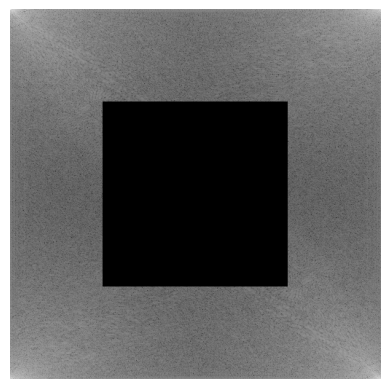

In [86]:
# Retrait de coefficients dans une zone rectangulaire :

# Taille de l'image
rows, cols = fft_img.shape

# Déterminer les limites du rectangle (dans ce cas on enleve 25% des coefficients)
margin_rows = int(rows * np.sqrt(0.25))
margin_cols = int(cols * np.sqrt(0.25))

left = cols // 2 - margin_cols // 2
right = cols // 2 + margin_cols // 2
top = rows // 2 - margin_rows // 2
bottom = rows // 2 + margin_rows // 2

# Créer un masque rectangulaire de la même taille que l'image fréquentielle
mask_rect = np.ones_like(fft_img)

# Remplacer les coefficients dans le rectangle par des zéros
for ligne in range(top, bottom) :
  for col in range(left, right) :
    mask_rect[ligne, col] = 0

# Appliquer le masque à l'image fréquentielle
masked_fft_img = fft_img * mask_rect

# Calculer le module du spectre de l'image masquée
magnitude_spectrum_masked = np.abs(masked_fft_img)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_masked_log = np.log(1 + magnitude_spectrum_masked)

plt.imshow(magnitude_spectrum_masked_log, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.show()

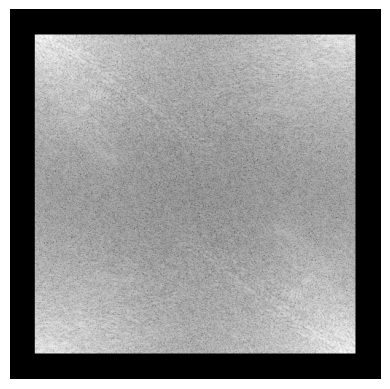

In [87]:
# Taille de l'image
rows, cols = fft_img.shape

# Déterminer les limites du rectangle (dans ce cas on enleve 25% des coefficients)
margin_rows = int(rows * np.sqrt(1 - 0.25))
margin_cols = int(cols * np.sqrt(1 - 0.25))

left = cols // 2 - margin_cols // 2
right = cols // 2 + margin_cols // 2
top = rows // 2 - margin_rows // 2
bottom = rows // 2 + margin_rows // 2

# Créer un masque rectangulaire de la même taille que l'image fréquentielle (initialiser a 0)
mask_bordure = np.zeros(np.shape(fft_img), dtype=complex)

# Remplacer les coefficients dans le rectangle par les valeurs de fft_img
for ligne in range(top, bottom) :
  for col in range(left, right) :
    mask_bordure[ligne, col] = fft_img[ligne, col]

# Calculer le module du spectre de l'image masquée
magnitude_spectrum_masked = np.abs(mask_bordure)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_masked_log = np.log(1 + magnitude_spectrum_masked)

plt.imshow(magnitude_spectrum_masked_log, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.show()


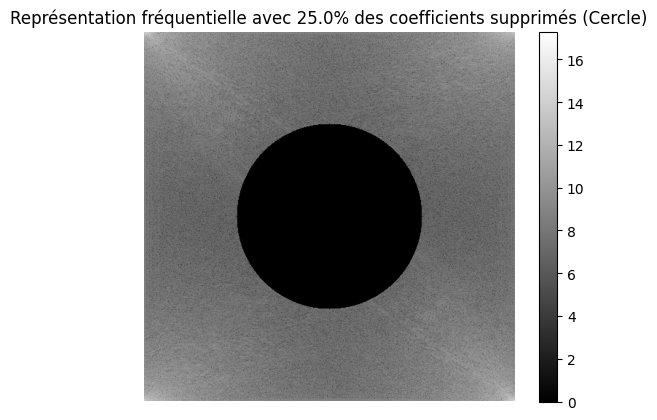

In [88]:
# Retrait de coefficients dans une zone circulaire de 25% :

# Spécifier le pourcentage de coefficients à supprimer (dans ce cas, 25%)
percentage_to_remove = 0.25

# Taille de l'image
rows, cols = fft_img.shape

# Déterminer le rayon du cercle en fonction du pourcentage spécifié
radius = int(min(rows, cols) * np.sqrt(percentage_to_remove) / 2)

# Créer un masque circulaire de la même taille que l'image fréquentielle
mask_cercle = np.ones_like(fft_img)

# Créer une grille de coordonnées
Y, X = np.ogrid[:rows, :cols]

# Calculer le centre du cercle
center_row, center_col = rows // 2, cols // 2

# Créer le masque circulaire en mettant à zéro les coefficients en dehors du cercle
mask_cercle[(Y - center_row)**2 + (X - center_col)**2 <= radius**2] = 0

# Appliquer le masque à l'image fréquentielle
masked_fft_img = fft_img * mask_cercle

# Calculer le module du spectre de l'image masquée
magnitude_spectrum_masked = np.abs(masked_fft_img)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_masked_log = np.log(1 + magnitude_spectrum_masked)

plt.imshow(magnitude_spectrum_masked_log, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.colorbar()
plt.title(f'Représentation fréquentielle avec {percentage_to_remove*100}% des coefficients supprimés (Cercle)')
plt.show()

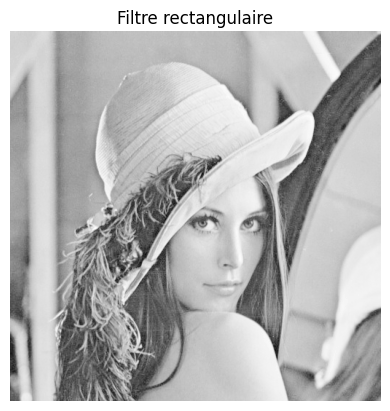

In [89]:
img_rect = np.fft.ifft2(masked_fft_img)

# Calculer le module
magnitude_spectrum = np.abs(img_rect)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.title('Filtre rectangulaire')
plt.show()


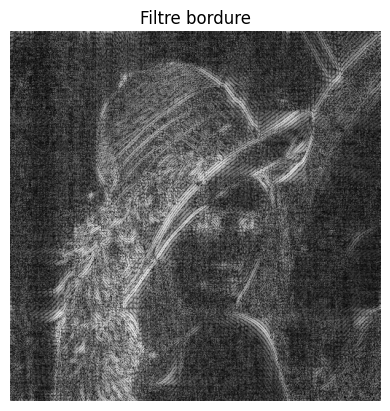

In [92]:
img_bordure = np.fft.ifft2(mask_bordure)

# Calculer le module
magnitude_spectrum = np.abs(img_bordure)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.title('Filtre bordure')
plt.show()

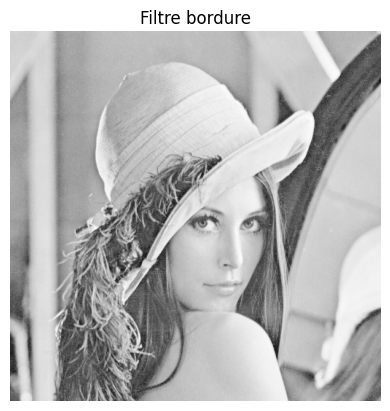

In [93]:
img_cercle = np.fft.ifft2(masked_fft_img)

# Calculer le module
magnitude_spectrum = np.abs(img_cercle)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.title('Filtre bordure')
plt.show()

* Où se situent les hautes et les basses fréquences ?

Le hautes fréquences se situent sur les contours.

* A partir de quel pourcentage de coefficients complexes supprimés aux basses fréquences l'image n'est-elle plus reconnaissable ?

In [74]:
# il suffit de tester le code qvec différents pourcentages

votre réponse...

* Suggérer une configuration qui ne conserve que les contours de l'image.

# Réduction du bruit de l'image

Nous allons essayer de débruiter l'image ci-dessous (cela correspond à un bruit poivre et sel correspondant à 5% des pixels) (située ici : tp-m1-ts/tp2/img_b.jpg)

![Lena bruitée](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/img_b.jpg?ref_type=heads)

* Réduisez ce bruit à l'aide du spectre de Fourier.


* Comparez ce filtrage avec l'application d'un filtre médian 3x3 à l'image bruitée. Pour simplifier votre algorithme, vous pouvez utiliser les commandes [numpy.ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) et [numpy.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html).

In [ ]:
# à vous...

Vos commentaires...